# Yahoo Finance

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta


In [2]:
frequency = "1d"
start_time = "2018-01-01"
end_time = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')  # Set end_time to yesterday

1. **TLT (iShares 20+ Year Treasury Bond ETF)**: Invests in U.S. Treasury bonds with remaining maturities greater than 20 years, aiming to track the investment results of an index composed of U.S. Treasury bonds.

2. **IEF (iShares 7-10 Year Treasury Bond ETF)**: Seeks to track the investment results of an index composed of U.S. Treasury bonds with remaining maturities between 7 and 10 years.

3. **EZU (iShares MSCI Eurozone ETF)**: Provides exposure to large and mid-sized companies in Eurozone countries, tracking the MSCI EMU Index.

4. **CNYA (iShares MSCI China A ETF)**: Offers exposure to large and mid-cap Chinese equities in the A-shares market, tracking the MSCI China A Inclusion Index.

5. **EWJ (iShares MSCI Japan ETF)**: Tracks the investment results of an index composed of Japanese equities, representing large and mid-sized companies in Japan.

6. **IGLT.L (iShares Core UK Gilts UCITS ETF)**: Invests in UK government bonds (gilts), seeking to track the performance of an index composed of sterling-denominated UK government bonds.

7. **XBB.TO (iShares Core Canadian Universe Bond Index ETF)**: Offers exposure to Canadian government and corporate bonds, tracking the performance of the broad Canadian bond market.

8. **BOND.AX (PIMCO Australian Bond Index Fund)**: Provides diversified exposure to the Australian bond market, including government, semi-government, and corporate debt securities.

9. **INDA (iShares MSCI India ETF)**: Aims to track the investment results of an index composed of Indian equities, representing large and mid-sized companies in India.

10. **EWL (iShares MSCI Switzerland ETF)**: Tracks the investment results of an index composed of Swiss equities, representing the Swiss stock market.

11. **ERUS (iShares MSCI Russia ETF)**: Seeks to track the investment results of an index composed of Russian equities.

12. **EWZ (iShares MSCI Brazil ETF)**: Aims to track the investment results of an index composed of Brazilian equities, reflecting the performance of the Brazilian stock market.

13. **EWY (iShares MSCI South Korea ETF)**: Tracks the investment results of an index composed of South Korean equities, representing the South Korean stock market.

14. **ENZL (iShares MSCI New Zealand ETF)**: Seeks to track the investment results of an index composed of New Zealand equities.

15. **EWD (iShares MSCI Sweden ETF)**: Aims to track the investment results of an index composed of Swedish equities, representing the Swedish stock market.

16. **EWM (iShares MSCI Malaysia ETF)**: Seeks to track the investment results of an index composed of Malaysian equities, representing the Malaysian stock market.

In [3]:
import yfinance as yf

# Define ETFs
etfs = ["TLT", "IEF", "EZU", "CNYA", "EWJ", "IGLT.L", "XBB.TO", "BOND.AX", "INDA", "EWL", "ERUS", "EWZ", "EWY", "ENZL", "EWD", "EWM"]

# Fetch ETF data
etf_data = {etf: yf.Ticker(etf).info for etf in etfs}

# Retrieve AUM or market cap
aum = {etf: data.get('totalAssets', 0) for etf, data in etf_data.items()}  # Replace 'totalAssets' with the desired metric

# Calculate total AUM
total_aum = sum(aum.values())

# Calculate weightings
weights = {etf: value / total_aum for etf, value in aum.items()}

print(weights)


{'TLT': 0.38885760822225623, 'IEF': 0.23733374117905118, 'EZU': 0.05512229582981665, 'CNYA': 0.0018691532124829246, 'EWJ': 0.11149735828661055, 'IGLT.L': 0.0, 'XBB.TO': 0.05474578961840785, 'BOND.AX': 0.00031229276775030873, 'INDA': 0.05383947242196183, 'EWL': 0.010350169684085225, 'ERUS': 4.502729743237624e-05, 'EWZ': 0.047789691310546986, 'EWY': 0.03259198028276192, 'ENZL': 0.000986829085515959, 'EWD': 0.002654322728686626, 'EWM': 0.002004268072633402}


In [4]:
# Existing tickers and additional ETF tickers
tickers = ["^IRX", "^TNX", "^TYX", "SPY", "QQQ"]
additional_tickers = etfs  # ETFs list
tickers.extend(additional_tickers)

# Retrieve historical data
historical_data = {}
for ticker in tickers:
    historical_data[ticker] = yf.download(ticker, start=start_time, end=end_time, interval=frequency)['Close']

# Combine and weight data
combined_data = pd.DataFrame()
for ticker, data in historical_data.items():
    if ticker in weights:  # Apply weighting for ETFs
        combined_data[ticker] = data * weights[ticker]
    else:  # Use the data as is for other tickers
        combined_data[ticker] = data

# Calculate the Global Liquidity Index as the sum of all (weighted and non-weighted) columns
combined_data['Global_Liquidity_Index'] = combined_data.sum(axis=1)
combined_data.dropna(inplace=True)

# combined_data now contains the weighted Global Liquidity Index and individual ticker data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
combined_data.dropna(inplace=True)
combined_data

,^IRX,^TNX,^TYX,SPY,QQQ,TLT,IEF,EZU,CNYA,EWJ,...,BOND.AX,INDA,EWL,ERUS,EWZ,EWY,ENZL,EWD,EWM,Global_Liquidity_Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.378,2.465,2.811,268.769989,158.490005,48.797740,24.972257,2.403332,0.060888,6.722176,...,0.008017,1.945759,0.369708,0.001533,1.991874,2.472754,0.047269,0.090672,0.066662,525.554637
2018-01-03,1.370,2.447,2.785,270.470001,160.029999,49.031054,24.998363,2.416010,0.061400,6.814718,...,0.008004,1.952758,0.371571,0.001563,2.016247,2.494590,0.047259,0.090990,0.067303,529.168215
2018-01-04,1.370,2.453,2.786,271.609985,160.309998,49.023279,24.986496,2.456250,0.061682,6.898341,...,0.008004,1.961372,0.373848,0.001610,2.029628,2.476665,0.047713,0.092424,0.067885,530.703634
2018-01-05,1.370,2.476,2.811,273.420013,161.919998,48.883290,24.955643,2.480503,0.061869,6.917296,...,0.008004,1.993137,0.375608,0.001611,2.047310,2.509256,0.047841,0.093114,0.068847,534.124869
2018-01-08,1.380,2.480,2.814,273.920013,162.550003,48.852180,24.943776,2.470030,0.062093,6.957435,...,0.008004,1.991522,0.374987,0.001625,2.039186,2.511864,0.047634,0.092742,0.069308,535.250383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,5.210,3.894,4.036,472.700012,407.769989,38.469683,22.850492,2.607836,0.047103,7.038828,...,0.007704,2.592909,0.490495,0.000363,1.640620,2.089798,0.047101,0.103625,0.042250,973.185377
2023-12-22,5.208,3.901,4.054,473.649994,408.380005,38.294699,22.829133,2.603426,0.047103,7.061128,...,0.007692,2.603677,0.491116,0.000363,1.654479,2.084909,0.047062,0.104660,0.042410,974.601569
2023-12-27,5.235,3.789,3.945,476.510010,411.500000,39.084079,23.021373,2.635397,0.046916,7.097922,...,0.007723,2.629520,0.497533,0.000363,1.685542,2.113590,0.047605,0.105987,0.042410,981.543728


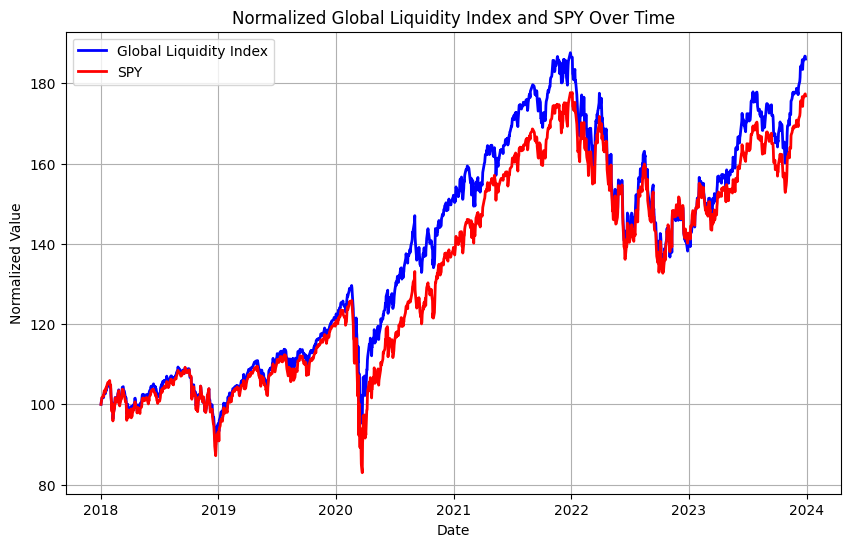

In [6]:
import matplotlib.pyplot as plt

# Normalize the data
combined_data['Normalized_GLI'] = combined_data['Global_Liquidity_Index'] / combined_data['Global_Liquidity_Index'].iloc[0] * 100
combined_data['Normalized_SPY'] = combined_data['SPY'] / combined_data['SPY'].iloc[0] * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['Normalized_GLI'], label='Global Liquidity Index', color='blue', linewidth=2)
plt.plot(combined_data.index, combined_data['Normalized_SPY'], label='SPY', color='red', linewidth=2)
plt.title('Normalized Global Liquidity Index and SPY Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

# Assuming combined_data is your DataFrame with 'Global_Liquidity_Index' and 'SPY' columns
# First, ensure both series are aligned and without missing values
gli_series = combined_data['Global_Liquidity_Index'].dropna()
spy_series = combined_data['SPY'].dropna()

# Align both series to the same date range if they are different
common_dates = gli_series.index.intersection(spy_series.index)
gli_series = gli_series.loc[common_dates]
spy_series = spy_series.loc[common_dates]

# Calculate the correlation
correlation = gli_series.corr(spy_series)

print(f"The correlation between the Global Liquidity Index and SPY is: {correlation}")


The correlation between the Global Liquidity Index and SPY is: 0.9895748685181356


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

# Assuming combined_data is your DataFrame with 'Global_Liquidity_Index' and 'SPY' columns

# Align both series to the same date range if they are different
common_dates = gli_series.index.intersection(spy_series.index)
gli_series_aligned = gli_series.loc[common_dates]
spy_series_aligned = spy_series.loc[common_dates]

# Perform the cointegration test
coint_test_result = coint(gli_series_aligned, spy_series_aligned)

# The coint function returns a tuple with the test statistic, p-value, and critical values
coint_t_statistic, p_value, crit_values = coint_test_result

print(f"Cointegration Test Statistic: {coint_t_statistic}")
print(f"P-Value: {p_value}")
print(f"Critical Values: {crit_values}")

# Interpretation
if p_value < 0.05:
    print("The series are likely cointegrated.")
else:
    print("No evidence of cointegration found.")


Cointegration Test Statistic: -2.0281032607602034
P-Value: 0.513942016254153
Critical Values: [-3.9040776  -3.34038529 -3.04740274]
No evidence of cointegration found.


In [10]:
combined_data.to_parquet('yahoo-finance.parquet')